**Prediction of Concrete Compressive Strength**



Concrete is the most commonly used material in civil engineering. That is why lots of research and experiments are done on concrete. In this experiment, it is tried to understand how the compressive strength will be according to the materials in the concrete. Concrete has many properties like shear strength, tensile strength. 

Compressive strength is one of the most important properties. Compressive strength is changed according to materials in concrete like other properties. 

To determine and understand that changing, lots of experiments should be done. 

Without further experimentation, it can be understood how the compression strength will be and how it is affected by machine learning models based on the existing experimental dataset.

**Importing Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("concrete_data.csv")

df.head() shows first five column of the data set.

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Info shows the number of entries in the dataset along with number of columns and datatypes present.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Describe tells the count value along with mean value, standard deviation, minimum and maximum values of columns.

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Isna shows the missing values, or null values present in the columns, Here 0 shows that there is no Null values.

In [ ]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Heatmap shows the correlation between all the column features with respect to other column features

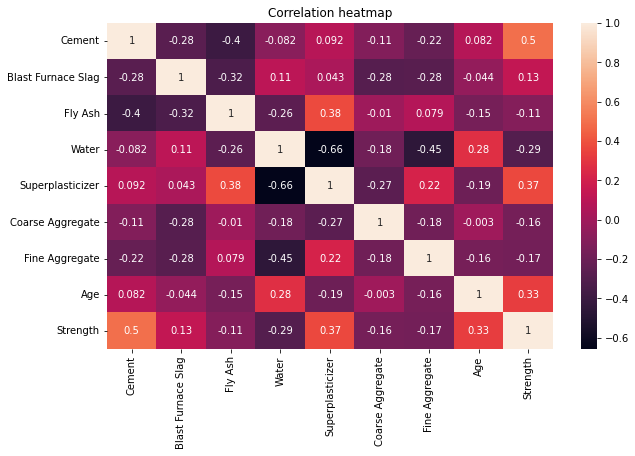

In [ ]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation heatmap')

plt.show()

**INTERPRETATION OF CORRELATION RESULTS**


Here the graph shows that the Compressive strength has the highest correlation with cement and lowest correlation with water.

In [ ]:
X = df[df.columns[df.columns!='Strength']].values 
y = df['Strength']

Checking for duplicates in data.

In [ ]:
df.duplicated().sum()

25

and it can easily seen that there are 25 duplicated values.

So lets drop all the duplicate values from the dataset.

In [ ]:
df.drop_duplicates(inplace=True)

Correlation between the numerical variables are seen using pairplot visualization.

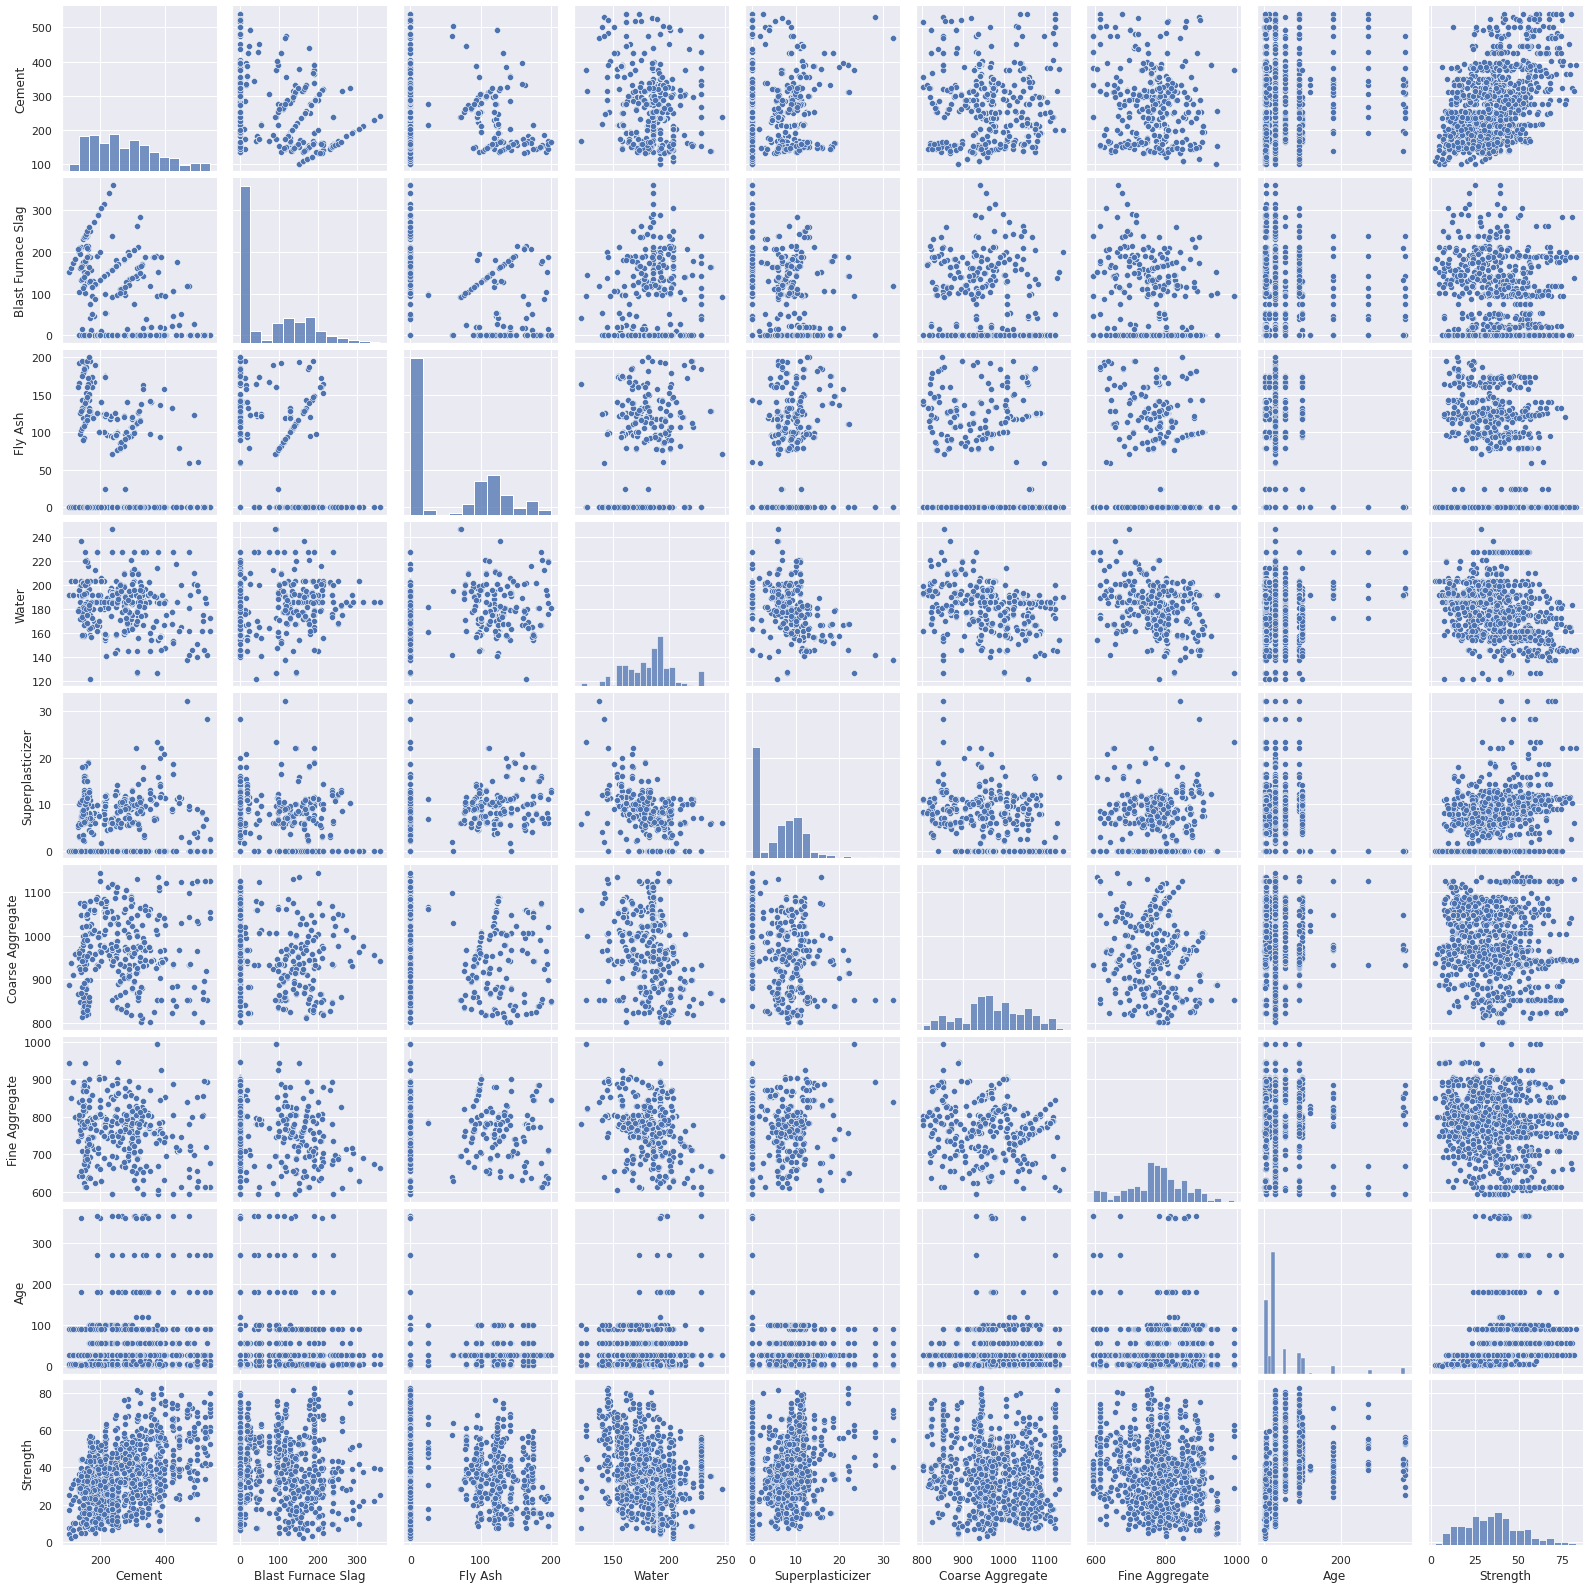

In [ ]:
sns.set_theme()
sns.pairplot(df)

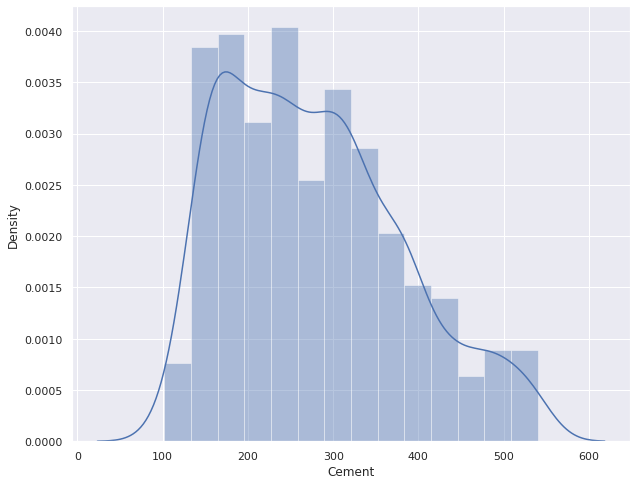

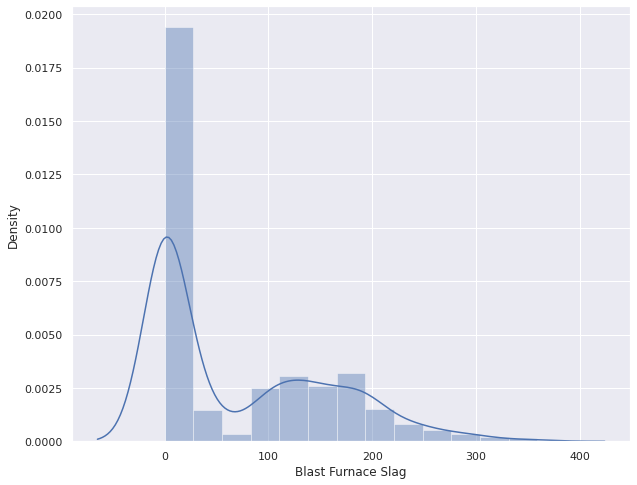

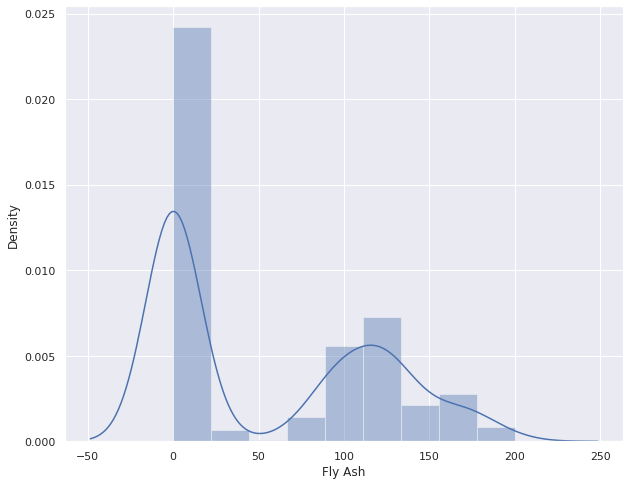

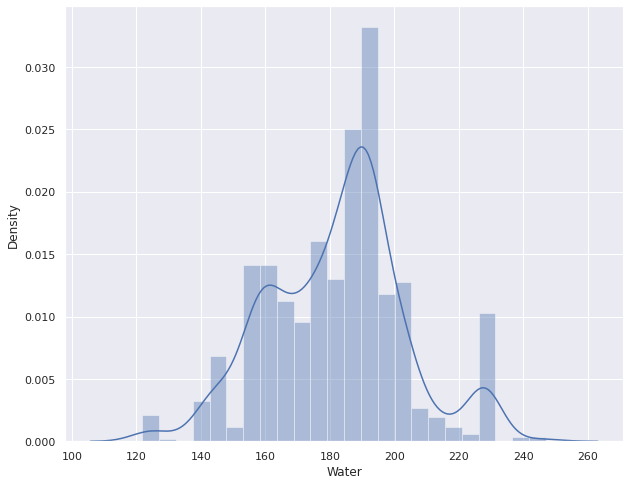

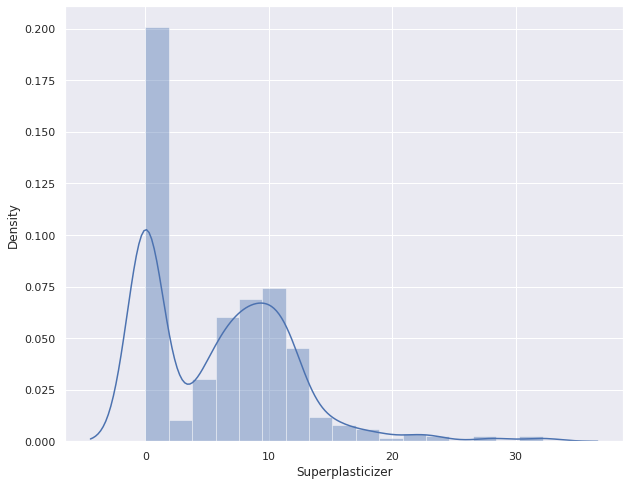

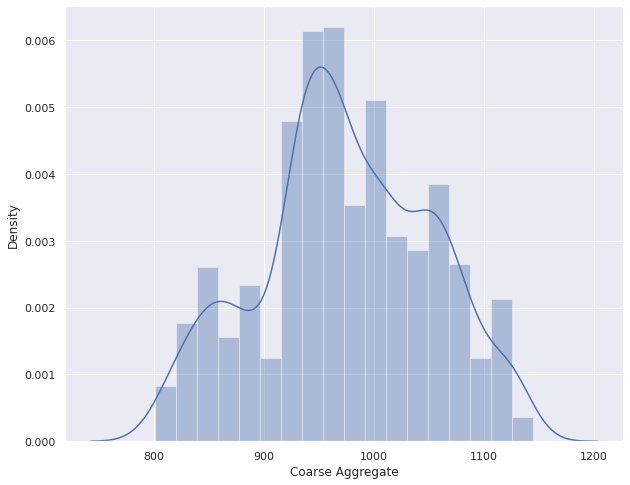

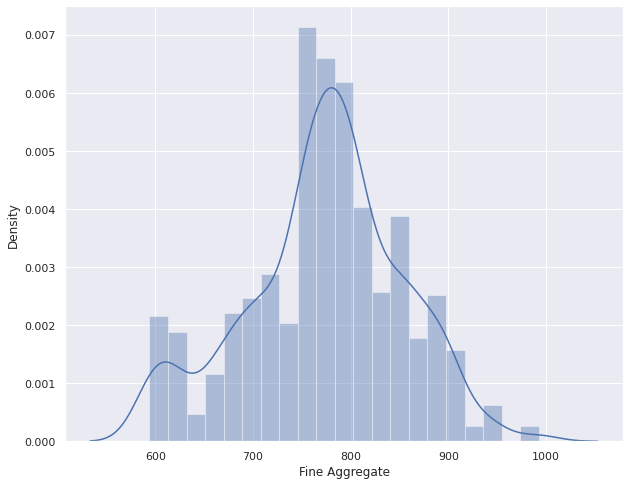

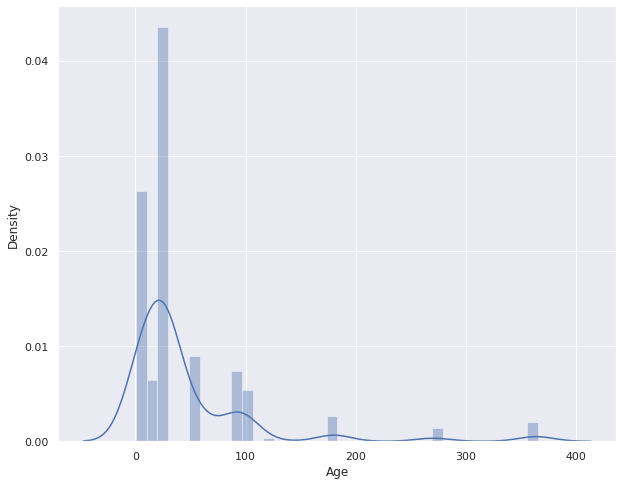

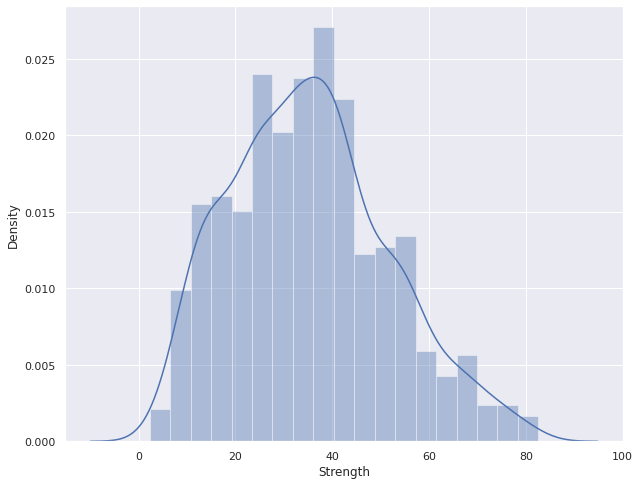

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Splitting the data into Train and Test values to build a Machine learning model.

Predictions are made using X test values and comparing with y test value to understand how model predictions are close enough to real values.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[-1.17339654,  0.86974019,  0.96632145, ..., -0.25244327,
        -0.67235424, -0.27973311],
       [ 1.3673954 , -0.6017783 ,  1.21645461, ..., -1.94192371,
        -0.29425198, -0.27973311],
       [-0.05809035, -0.85688789,  1.05074139, ...,  1.03814993,
         0.04891014, -0.6756834 ],
       ...,
       [-0.86991838, -0.85688789,  1.11014802, ...,  1.36498012,
         0.31595266,  0.86060372],
       [ 1.85564103,  0.52070389, -0.84714393, ..., -1.55461708,
         0.09882463, -0.27973311],
       [ 0.3143166 , -0.85688789,  0.91942149, ..., -0.61658872,
         0.11754257, -0.27973311]])

In [ ]:
y_train

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: Strength, Length: 824, dtype: float64

In [ ]:
X_test

array([[-0.14520869,  0.46504362, -0.84714393, ..., -0.52651741,
        -1.29254178,  5.05767679],
       [ 0.77958596,  1.3347354 , -0.84714393, ..., -0.36310231,
        -0.22187597, -0.61233136],
       [ 1.04094098,  1.3347354 , -0.84714393, ..., -0.36310231,
        -0.22187597, -0.27973311],
       ...,
       [ 0.04913221,  1.47272649, -0.84714393, ...,  0.40765076,
         0.37585005, -0.61233136],
       [ 1.3673954 , -0.6017783 ,  1.21645461, ..., -1.94192371,
        -0.29425198,  0.16373121],
       [ 0.55365269, -0.85688789, -0.84714393, ..., -0.06329352,
         0.09258532,  0.7022236 ]])

In [ ]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Strength, Length: 206, dtype: float64

Spliting Dataset with respect to X and y variables using Xtrain, Xtest, ytrain and ytest

In [ ]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

In [ ]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])


Importing various models of Machine Learning

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 7.745559243921434
MSE: 95.97094009110677
r2 Score: 0.6275531792314851
RMSE (Cross Validated): 11.1333326391661


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)

print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"Accuracy : {r2}")

MAE : 7.567220721921534
MSE : 90.71180495992122
RMSE : 9.524274510949441
Accuracy : 0.6479629840926503


In [ ]:
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)

print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"Accuracy : {r2}")

MAE : 7.567220721921534
MSE : 90.71180495992122
RMSE : 9.524274510949441
Accuracy : 0.6479629840926503


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)

print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"Accuracy : {r2}")

MAE : 3.7956996397750045
MSE : 30.8708919546578
RMSE : 5.5561580210301615
Accuracy : 0.8801953429664687


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrains = sc.fit_transform(X_train)
xtests = sc.transform(X_test)

In [ ]:
svm = SVR()
svm.fit(xtrains, y_train)
ypred = svm.predict(xtests)

In [ ]:
print(r2_score(y_test, ypred))

0.6547637106078585


In [ ]:
#kernel, C, gamma
svm = SVR(kernel="linear", C=1)
svm.fit(xtrains, y_train)
ypred = svm.predict(xtests)
print(r2_score(y_test, ypred))

0.5363161319820986


In [ ]:
X = df[df.columns[df.columns!='Strength']].values 
y = df['Strength']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
df_columns = df.columns

Feature And Target Setting

In [ ]:
pred = df[df_columns[df_columns!="Strength"]]
targ = df["Strength"]

In [ ]:
targ.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [ ]:
pred_normal = ((pred - pred.mean())/pred.std())
pred_normal.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.504869,-0.836054,-0.864944,-0.940766,-0.596833,0.845881,-1.203482,-0.280173
1,2.504869,-0.836054,-0.864944,-0.940766,-0.596833,1.039231,-1.203482,-0.280173
2,0.516259,0.817638,-0.864944,2.152114,-1.019133,-0.546236,-2.224139,3.516818
3,0.516259,0.817638,-0.864944,2.152114,-1.019133,-0.546236,-2.224139,5.007372
4,-0.766993,0.700429,-0.864944,0.465088,-1.019133,0.051859,0.657349,4.928921


In [ ]:
n_cols = pred_normal.shape[1]

In [ ]:
n_cols

8

Activation Function: ReLU

Optimizer: Adam

Loss Function: Mean Squared Error

In [ ]:
def regression_model():
    model = Sequential()
    model.add(Dense(50,activation = "relu",input_shape = (n_cols,)))
    model.add(Dense(50,activation ="relu"))
    model.add(Dense(50,activation ="relu"))
    model.compile(optimizer = "adam", loss = "mean_squared_error")
    
    return model

In [ ]:
model = regression_model()
model.fit(pred_normal,targ,validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 1604.5410 - val_loss: 1227.0071
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 1563.6438 - val_loss: 1176.7197
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 1434.5133 - val_loss: 1041.6455
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 1142.1527 - val_loss: 792.0322
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 716.4494 - val_loss: 491.8372
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 381.3549 - val_loss: 305.1635
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 282.2243 - val_loss: 248.1797
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 257.5212 - val_loss: 227.7392
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 242.3702 - val_loss: 214.4197
Epoch 10/100
22/22 [==============================] - 0s 4ms/step

Here the loss value is decreased from 1604 to 125

In [ ]:
ann = Sequential()


In [ ]:
ypred = ann.predict(X_test)

In [ ]:
ypred

array([[ 173. ,  116. ,    0. , ...,  946.8,  856.8,   90. ],
       [ 375. ,    0. ,    0. , ..., 1038. ,  758. ,   28. ],
       [ 236. ,    0. ,    0. , ...,  968. ,  885. ,    7. ],
       ...,
       [ 266. ,  114. ,    0. , ...,  932. ,  670. ,  270. ],
       [ 152.6,  238.7,    0. , ..., 1001.8,  683.9,   28. ],
       [ 108.3,  162.4,    0. , ...,  938.2,  849. ,    3. ]],
      dtype=float32)

In [ ]:
ypred>50

array([[ True,  True, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True, False],
       [ True, False, False, ...,  True,  True, False],
       ...,
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True, False, ...,  True,  True, False]])

In [ ]:
y_pred = ypred>50

In this project 5 different machine learning models are used to predict compressive strength. 
According to models mean squared error, mean absolute error and R2 score decided to which model is the best.

Before building machine learning models, dataset is created to compare models.

In [ ]:
models_comparison = pd.DataFrame(columns=["Model Name", "Mean Squared Error", "Mean Absolute Error", "R2 Score"])
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Create models and train
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
# Make predictions
y_pred = linear_regressor.predict(X_test)
accuracies = cross_val_score(linear_regressor,X_train,y_train, cv=10)
metrics = {"Model Name" : "Linear Regression",
"Mean Squared Error" : mean_squared_error(y_test, y_pred),
"Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
"R2 Score" : r2_score(y_test, y_pred),
}
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,118.000518,8.710259,0.5617


Linear regression model is the very basic model. 
That is why the mean squared error is high.

**Support Vector Regression**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Create models and train
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
# Make predictions
y_pred = svr.predict(X_test)
accuracies = cross_val_score(svr,X_train,y_train, cv=10)
metrics = {"Model Name" : "Support Vector Regression",
"Mean Squared Error" : mean_squared_error(y_test, y_pred),
"Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
"R2 Score" : r2_score(y_test, y_pred),
}
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,118.000518,8.710259,0.561700
1,Support Vector Regression,207.551712,11.504078,0.229071


**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Create models and train
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
# Make predictions
y_pred = tree.predict(X_test)
accuracies = cross_val_score(tree,X_train,y_train, cv=10)
metrics = {"Model Name" : "Decision Tree Regression",
"Mean Squared Error" : mean_squared_error(y_test, y_pred),
"Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
"R2 Score" : r2_score(y_test, y_pred),
}
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,118.000518,8.710259,0.561700
1,Support Vector Regression,207.551712,11.504078,0.229071
2,Decision Tree Regression,49.122317,4.470166,0.817540


Decision Tree Regression has huge improvement in all metrics

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Random Forest Regression

In [ ]:
# Create models and train
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
accuracies = cross_val_score(rf,X_train,y_train, cv=10)
metrics = {"Model Name" : "Random Forest Regression",
"Mean Squared Error" : mean_squared_error(y_test, y_pred),
"Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
"R2 Score" : r2_score(y_test, y_pred),
}
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,118.000518,8.710259,0.561700
1,Support Vector Regression,207.551712,11.504078,0.229071
2,Decision Tree Regression,49.122317,4.470166,0.817540
3,Random Forest Regression,25.906553,3.703965,0.903773


Even Random Forest Regression model has improvement in all metrics when compared to others.

XG Booster

In [ ]:
# Create models and train
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
# Make predictions
y_pred = xgb.predict(X_test)
accuracies = cross_val_score(xgb,X_train,y_train, cv=10)
metrics = {"Model Name" : "XGB Regression",
"Mean Squared Error" : mean_squared_error(y_test, y_pred),
"Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
"R2 Score" : r2_score(y_test, y_pred),
}
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,118.000518,8.710259,0.561700
1,Support Vector Regression,207.551712,11.504078,0.229071
2,Decision Tree Regression,49.122317,4.470166,0.817540
3,Random Forest Regression,25.906553,3.703965,0.903773
4,XGB Regression,27.065510,3.833153,0.899468


In [ ]:
models_comparison = models_comparison.round(3)
models_comparison.sort_values(by = ['Mean Squared Error'])

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
3,Random Forest Regression,25.907,3.704,0.904
4,XGB Regression,27.066,3.833,0.899
2,Decision Tree Regression,49.122,4.470,0.818
0,Linear Regression,118.001,8.710,0.562
1,Support Vector Regression,207.552,11.504,0.229


Random Forest Regression has worked good when compared to other 4 regressions.

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results = pd.DataFrame(columns=["Experiment Results", "Predictions"])
results["Experiment Results"] = y_test
results["Predictions"] = y_pred

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
results_rnd20 = results.sample(n=20)
data1 = go.Bar(x=[i for i in range(1, len(results_rnd20)+1)],
y=results_rnd20["Experiment Results"],name='Experiment Result')
data2 = go.Bar(x=[i for i in range(1, len(results_rnd20)+1)],
y=results_rnd20["Predictions"],name='Prediction')
data = [data1, data2]
layout = go.Layout(barmode='group',legend={'traceorder':'normal'},
title='Experiement Results vs Prediction Results (Random 20 Sample)',title_x=0.5,xaxis_tickfont_size=14,
yaxis=dict(title='Compressive Strength (MPa)',titlefont_size=16,tickfont_size=14,))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Experiement Results vs Prediction Results')

As can be seen in the bar chart, predictions are close enough to experiment results. That means the Random Forest regression model is a successful model to predict the compressive strength of concrete according to components in concrete. Also Machine learning does not always work. It’s just a model. That is why models should be created according to aim and outputs of results.
